
# üè† Caso de Machine Learning con Regresi√≥n Lineal: **Boston Housing**

Este notebook colab muestra un flujo **end-to-end** de *machine learning supervisado* usando **Regresi√≥n Lineal** para predecir el precio medio de viviendas (MEDV) en el cl√°sico dataset **Boston Housing**.

## Qu√© hace este colab
1. Cargar el dataset.  
2. Separar en **train/test**.  
3. Entrenar `LinearRegression`.  
4. Evaluar con **MAE**, **RMSE** y **R¬≤**.  
5. Validaci√≥n cruzada **K-Fold**.  
6. Gr√°ficos: *y real vs. y predicho*, residuos y coeficientes (importancia).

> **Nota √©tica/dataset:** el dataset Boston ha sido criticado por sesgos hist√≥ricos. Se usa aqu√≠ solo con fines did√°cticos.


In [2]:
# Paso 1: Importar librerias a utilizar en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Cargar dataset Boston desde GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


In [4]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

| Columna     | Significado                                                                                   |
| ----------- | --------------------------------------------------------------------------------------------- |
| **crim**    | Tasa de criminalidad per c√°pita por ciudad.                                                   |
| **zn**      | Proporci√≥n de terrenos residenciales con lotes mayores a 25,000 pies cuadrados.               |
| **indus**   | Proporci√≥n de acres de negocios no minoristas por ciudad.                                     |
| **chas**    | Variable ficticia (dummy) que indica si el tracto limita con el r√≠o Charles (1 = s√≠, 0 = no). |
| **nox**     | Concentraci√≥n de √≥xidos de nitr√≥geno (partes por 10 millones).                                |
| **rm**      | N√∫mero promedio de habitaciones por vivienda.                                                 |
| **age**     | Proporci√≥n de unidades ocupadas por sus due√±os construidas antes de 1940.                     |
| **dis**     | Distancia ponderada a cinco centros de empleo de Boston.                                      |
| **rad**     | √çndice de accesibilidad a autopistas radiales.                                                |
| **tax**     | Tasa de impuesto a la propiedad por cada \$10,000.                                            |
| **ptratio** | Relaci√≥n alumno-maestro por ciudad.                                                           |
| **b**       | 1000(Bk - 0.63)¬≤, donde Bk es la proporci√≥n de residentes de raza negra por ciudad.           |
| **lstat**   | Porcentaje de poblaci√≥n de bajo estatus socioecon√≥mico.                                       |
| **medv**    | Valor medio de las viviendas ocupadas por sus due√±os (en miles de d√≥lares).                   |


In [12]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [10]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [13]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["medv"])
y = df["medv"]

target_name = "medv"
dataset_used = "Boston (CSV desde GitHub)"

print(f"Dataset utilizado: {dataset_used}")
df.head()

Dataset utilizado: Boston (CSV desde GitHub)


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [16]:
# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((404, 13), (102, 13))

In [17]:
# 3) Entrenar modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [18]:
# 4) Evaluaci√≥n
y_pred = linreg.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # aqu√≠ el cambio
r2   = r2_score(y_test, y_pred)

In [19]:
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R^2  : {r2:.4f}")

MAE  : 3.1891
RMSE : 4.9286
R^2  : 0.6688


| M√©trica                                    | ¬øQu√© mide?                                                                                                             |
| ------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------- |
| **MAE** (Error Absoluto Medio)             | Promedio de la magnitud de los errores, sin importar el signo. F√°cil de interpretar.                                   |
| **MSE** (Error Cuadr√°tico Medio)           | Promedio de los errores al cuadrado; penaliza m√°s los errores grandes.                                                 |
| **RMSE** (Ra√≠z del Error Cuadr√°tico Medio) | Ra√≠z cuadrada del MSE, expresado en las mismas unidades que la variable objetivo.                                      |
| **R¬≤** (Coeficiente de determinaci√≥n)      | Proporci√≥n de la variabilidad de la variable objetivo que explica el modelo. Valores cercanos a 1 indican buen ajuste. |


**Observaciones**

* MAE (Error Absoluto Medio): 3.1891: Este valor indica que, en promedio, la diferencia entre las predicciones de tu modelo y los valores reales es de aproximadamente 3.19 unidades. Es una medida del error absoluto promedio, y un valor m√°s bajo es mejor.

* RMSE (Ra√≠z del Error Cuadr√°tico Medio): 4.9286: Similar al MAE, esta m√©trica tambi√©n mide el error promedio de las predicciones, pero le da m√°s peso a los errores grandes. La diferencia principal es que el RMSE penaliza m√°s los errores grandes. En tu caso, el RMSE de 4.93 unidades indica la desviaci√≥n est√°ndar de los residuos (la distancia entre los puntos de datos y la l√≠nea de regresi√≥n).

* (R-cuadrado): 0.6688: El R2 es una m√©trica clave. Un valor de 0.6688, o 66.88%, significa que aproximadamente el 67% de la variabilidad de la variable objetivo (Y_test) puede ser explicada por las variables independientes (X_test) en tu modelo. Un valor m√°s cercano a 1 indica que el modelo explica una mayor proporci√≥n de la variabilidad, por lo que un 67% es un resultado bastante bueno, aunque no perfecto.

**Resumen**
El modelo de regresi√≥n lineal tiene un rendimiento aceptable. La m√©trica R2
  sugiere que las variables que est√°s utilizando son moderadamente efectivas para predecir la variable objetivo. Sin embargo, hay un 33% de variabilidad que no est√° siendo explicada, lo que podr√≠a deberse a variables omitidas, relaciones no lineales o simplemente ruido en los datos. Para mejorar el modelo, podr√≠as considerar agregar m√°s caracter√≠sticas, explorar transformaciones de datos o probar otros algoritmos m√°s complejos.

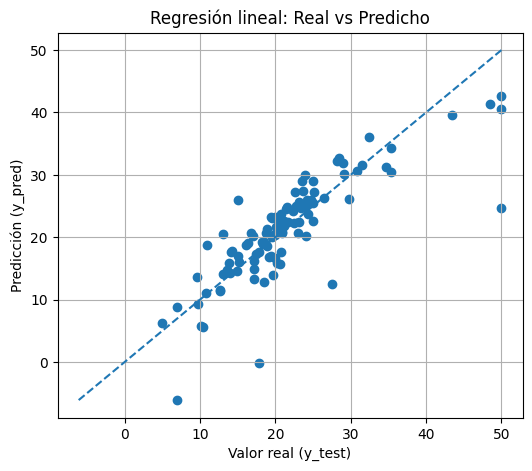

In [25]:
# a) Gr√°fico: Real vs. Predicho
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Valor real (y_test)")
plt.ylabel("Predicci√≥n (y_pred)")
plt.title("Regresi√≥n lineal: Real vs Predicho")
# L√≠nea identidad
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], linestyle='--')
plt.grid(True)
plt.show()


* Existe una correlaci√≥n positiva: Como se puede ver en el gr√°fico de dispersi√≥n, los puntos tienden a seguir una tendencia ascendente. Esto significa que a medida que los valores reales aumentan, los valores predichos tambi√©n aumentan. Esta es una se√±al positiva y esperada en un modelo de regresi√≥n lineal.

* El modelo tiene un buen ajuste en general: Los puntos se agrupan de manera bastante cercana alrededor de la l√≠nea de identidad (la l√≠nea discontinua). Esta l√≠nea representa el escenario ideal donde los valores predichos son exactamente iguales a los valores reales. El hecho de que la mayor√≠a de los puntos est√©n cerca de esta l√≠nea indica que tu modelo est√° haciendo buenas predicciones en general.

* Identificaci√≥n de errores y valores at√≠picos: Aunque el ajuste es bueno, hay algunos puntos que se desv√≠an de la l√≠nea, especialmente en el rango superior de valores reales (alrededor de 40 a 50). Estos puntos son los errores de tu modelo.
 - Un punto con un valor real de 40 y una predicci√≥n de aproximadamente 25 es un ejemplo de un error significativo.
 - Otro punto con un valor real de 50 y una predicci√≥n de 42, aunque menos desviado, sigue siendo un error.

* Sesgo del modelo: El gr√°fico sugiere que el modelo podr√≠a tener un ligero sesgo en ciertos rangos. Por ejemplo, en los valores reales bajos (entre 0 y 10), las predicciones parecen estar ligeramente por encima de la l√≠nea. En los valores altos (superiores a 40), las predicciones tienden a estar por debajo de la l√≠nea. Esto podr√≠a indicar que el modelo no est√° capturando completamente la relaci√≥n subyacente en esos extremos.

# **Gr√°fico: Residuos**
Los residuos son la diferencia entre el valor real de un dato y el valor que tu modelo de regresi√≥n predice para ese mismo dato. En t√©rminos simples, son los errores de tu modelo.

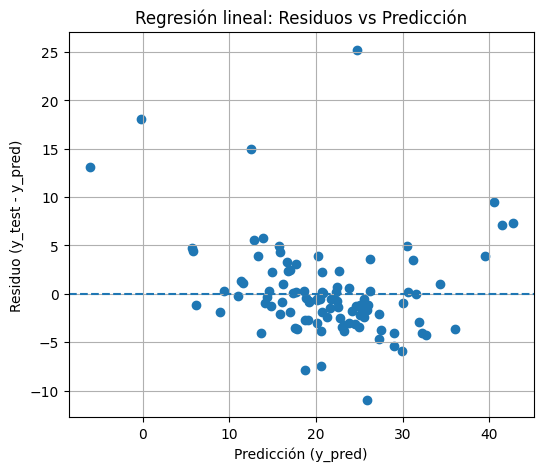

In [26]:
#b) Gr√°fico: Residuos
resid = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, resid)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicci√≥n (y_pred)")
plt.ylabel("Residuo (y_test - y_pred)")
plt.title("Regresi√≥n lineal: Residuos vs Predicci√≥n")
plt.grid(True)
plt.show()


**Conclusiones del gr√°fico de residuos**
* Ausencia de un patr√≥n claro: Un buen modelo de regresi√≥n lineal debe tener residuos distribuidos de manera aleatoria alrededor de la l√≠nea horizontal en cero. En tu gr√°fico, los puntos se ven dispersos y no forman un patr√≥n discernible, como una forma de "U" o un embudo. Esto es una se√±al positiva, ya que sugiere que el modelo no tiene un sesgo sistem√°tico y que la relaci√≥n lineal es una suposici√≥n adecuada para los datos.

* Varianza no constante (Heterocedasticidad): Al observar la dispersi√≥n de los puntos, se puede notar que la varianza de los residuos no parece ser constante. La dispersi√≥n de los puntos es mayor en los valores predichos bajos (cerca de 0 a 10) y altos (alrededor de 40), y es m√°s estrecha en los valores intermedios (alrededor de 20 a 30). Esta varianza no constante se conoce como heterocedasticidad.

* Presencia de valores at√≠picos: Hay algunos puntos que se desv√≠an significativamente de la l√≠nea en cero. Por ejemplo, el punto con un residuo de alrededor de 25 en una predicci√≥n de 20 es un valor at√≠pico notable. Estos puntos representan instancias en las que tu modelo hizo una predicci√≥n con un error muy grande.

# **Coeficientes**

Los coeficientes en un modelo de regresi√≥n lineal son los n√∫meros que multiplican a cada una de las variables (caracter√≠sticas o features) de tu modelo.

En la ecuaci√≥n de una regresi√≥n lineal simple, y=mx+b, el coeficiente es m, que es la pendiente de la l√≠nea. En una regresi√≥n lineal con m√∫ltiples variables, cada variable tiene su propio coeficiente. Por ejemplo, en y=c
1
‚Äã
 x
1
‚Äã
 +c
2
‚Äã
 x
2
‚Äã
 +‚ãØ+c
n
‚Äã
 x
n
‚Äã
 +b, los coeficientes son c
1
‚Äã
 ,c
2
‚Äã
 ,‚Ä¶,c
n
‚Äã
 .


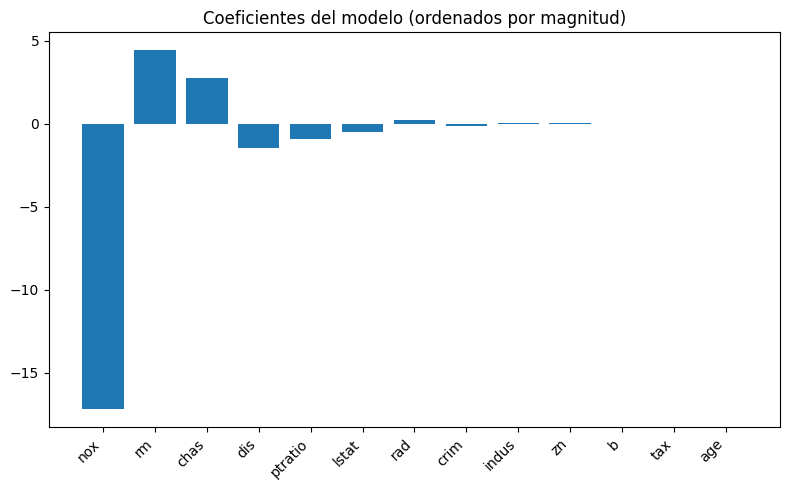

In [28]:
# c) Importancia (coeficientes)
feat_names = list(df.drop(columns=[target_name]).columns)
coefs = linreg.coef_

# Ordenar por magnitud
order = np.argsort(np.abs(coefs))[::-1]
feat_sorted = [feat_names[i] for i in order]
coefs_sorted = coefs[order]

plt.figure(figsize=(8,5))
plt.bar(range(len(coefs_sorted)), coefs_sorted)
plt.xticks(range(len(coefs_sorted)), feat_sorted, rotation=45, ha='right')
plt.title("Coeficientes del modelo (ordenados por magnitud)")
plt.tight_layout()
plt.show()


**Conclusiones del gr√°fico de coeficientes**
* Identificaci√≥n de las variables m√°s importantes: El gr√°fico de barras muestra la magnitud de los coeficientes de cada variable. Cuanto m√°s alta o m√°s baja sea la barra, m√°s importante es esa variable para el modelo.

  - Las variables nox y rm son las m√°s importantes, ya que sus coeficientes tienen la mayor magnitud (uno negativo y el otro positivo). Esto significa que un cambio en estas variables tiene el mayor impacto en la predicci√≥n del modelo.

* Direcci√≥n de la relaci√≥n (impacto positivo vs. negativo): El signo del coeficiente te dice si la relaci√≥n con la variable objetivo es positiva o negativa.

 - Impacto negativo: Las variables nox y ptratio tienen coeficientes negativos. Esto sugiere que a medida que los valores de estas variables aumentan, el valor predicho de la variable objetivo tiende a disminuir.

 - Impacto positivo: Las variables rm y chas tienen coeficientes positivos. Esto indica que a medida que los valores de estas variables aumentan, el valor predicho de la variable objetivo tambi√©n tiende a aumentar.

* Variables menos relevantes: Las variables cuyos coeficientes est√°n muy cerca de cero, como age, tax, b, zn, crim, e indus, tienen un impacto m√≠nimo en las predicciones del modelo. Es posible que estas variables no sean lo suficientemente relevantes para explicar la variabilidad de la variable objetivo o que su influencia est√© correlacionada con otras variables m√°s importantes.